In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from musichook.params import PATHS
from musichook.src import audio_processing
from musichook.utils import plots

In [3]:
### Audio Processing
chunk_length_ms = 1000
window_size_seconds = 10
filepath = os.path.join(PATHS['MUSIC_FOLDER'], 'Jimmy Buffett - Margaritaville.mp3')

In [4]:
print("Cutting the song into segments...")
second_segments = audio_processing.cut_song_into_segments(filepath, chunk_length_ms)

Cutting the song into segments...


In [5]:
len(second_segments)

249

In [6]:
print("Building the feature vector...")
feature_vector = audio_processing.build_feature_vector(
    second_segments, True, False, False
)

Building the feature vector...
shape of chromagram: (12, 173)
shape of melspectrogram: N/A
shape of mfcc: N/A


In [7]:
feature_vector[0].shape, len(feature_vector)

((12, 173), 249)

In [8]:
print("Compute similarity matrix")
similarity_matrix = audio_processing.compute_similarity_matrix(feature_vector)

Compute similarity matrix


In [9]:
similarity_matrix.shape

(249, 249)

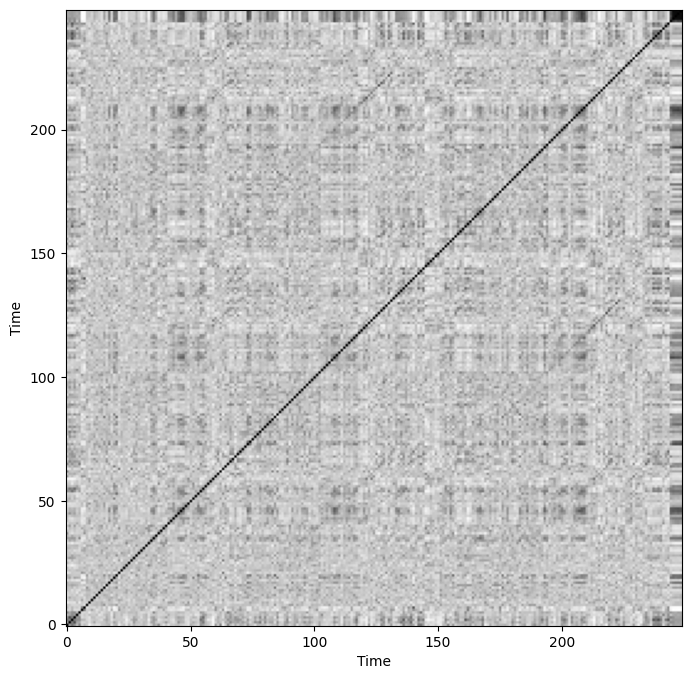

In [15]:
plots.display_similarity_matrix(similarity_matrix)

In [16]:
time_lag = audio_processing.compute_time_lag_surface(similarity_matrix, 10)
time_lag.shape

(249, 249)

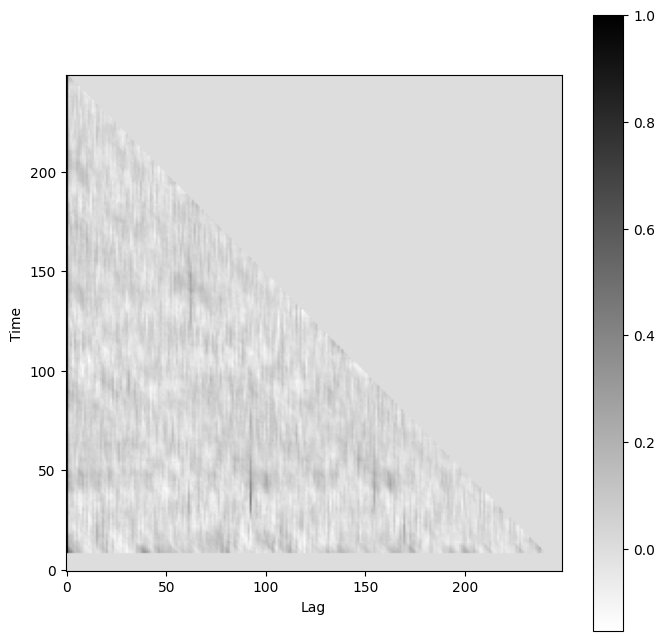

In [17]:
plots.display_time_lag_surface(time_lag)

In [13]:
song_length = len(second_segments)
_, start_time = audio_processing.find_thumbnail(time_lag, song_length)
start_time

92